In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import core
from data import read_data

# TEST_DATA_PATH = "labs/linear/resources/"
TEST_DATA_PATH = "resources/"

In [2]:
def evaluate_nrmse_score(dataset, W):
    X = np.array(dataset.X)
    Y = np.array(dataset.Y)
    sum = np.sum((Y - (X @ W)) ** 2) / Y.size

    y_diff = np.max(Y) - np.min(Y)
    return math.sqrt(sum) / y_diff

In [3]:
print("Compare Gradient descent and Generalized inverse")
for i in range(1, 8):
    print("Dataset #" + str(i))

    train, test = read_data(TEST_DATA_PATH + str(i) + ".txt")
    gd_W = core.gradient_descent(train)
    gd_score = evaluate_nrmse_score(test, gd_W)
    print("for gradient descent NRMSE: '" + str(gd_score) + "'")

    gi_W = core.generalized_inverse(train)
    gi_score = evaluate_nrmse_score(test, gi_W)
    print("for generalized inverse NRMSE: '" + str(gi_score) + "'")

Compare Gradient descent and Generalized inverse
Dataset #1
for gradient descent NRMSE: '0.010057831966680229'
for generalized inverse NRMSE: '6.17515348778016e-05'
Dataset #2
for gradient descent NRMSE: '0.024801456603065892'
for generalized inverse NRMSE: '4.462895885936386e-06'
Dataset #3
for gradient descent NRMSE: '0.5224706789264091'
for generalized inverse NRMSE: '0.0005214562770728551'
Dataset #4
for gradient descent NRMSE: '0.05413916373664078'
for generalized inverse NRMSE: '0.0001836266406629134'
Dataset #5
for gradient descent NRMSE: '0.03180378923364237'
for generalized inverse NRMSE: '3.449375312868811e-08'
Dataset #6
for gradient descent NRMSE: '0.0013168520901358522'
for generalized inverse NRMSE: '0.0004930565498473669'
Dataset #7
for gradient descent NRMSE: '0.000895082916453439'
for generalized inverse NRMSE: '6.950690391636013e-07'


Graph for gradient descent train and testing


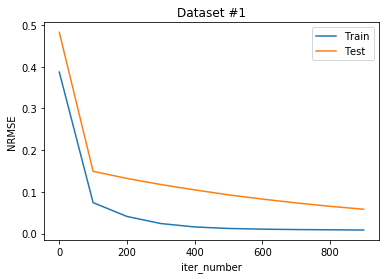

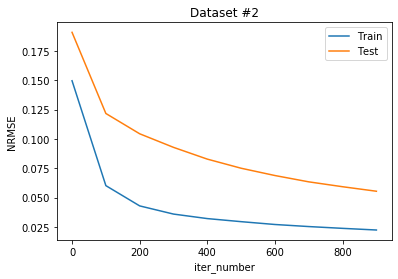

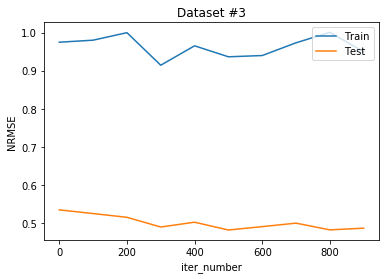

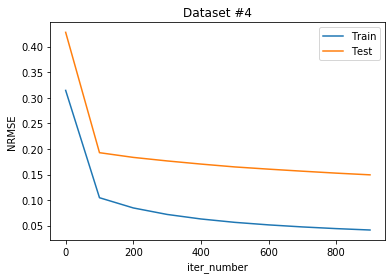

In [ ]:
print("Graph for gradient descent train and testing")
iter_range = range(0, 1000, 100)

for i in range(1, 8):
    train, test = read_data(TEST_DATA_PATH + str(i) + ".txt")
    train_scores = []
    test_scores = []

    for iter_number in iter_range:
        curr_W = core.gradient_descent_steps(train, iter_number)
        train_scores.append(evaluate_nrmse_score(train, curr_W))

        curr_W = core.gradient_descent_steps(test, iter_number)
        test_scores.append(evaluate_nrmse_score(test, curr_W))

    plt.plot(iter_range, train_scores, iter_range, test_scores)
    plt.ylabel('NRMSE')
    plt.xlabel('iter_number')
    plt.title('Dataset #' + str(i))
    plt.legend(('Train', 'Test'), loc='upper right')
    plt.show()